In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
raw_df = pd.read_csv('startup_funding.csv', index_col=0)

In [53]:
raw_df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [54]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 9 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 185.3+ KB


In [247]:
df = raw_df.copy()

In [248]:
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype('float')

In [249]:
df['AmountInUSD'].fillna(0, inplace=True)

In [250]:
# some dates have points instead of forward slashes in them
df[df['Date'].apply(lambda x: '.' in x)]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
2103,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,0.0,NaN
2104,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri, Chandrakant Gogri",Seed Funding,2000000.0,NaN
2159,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,500000.0,NaN
2339,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,650000.0,NaN


In [251]:
df[df['Date'].apply(lambda x: '//' in x)]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,200000.0,NaN


In [252]:
df['Date'] = df['Date'].str.replace('.', '/')
df['Date'] = df['Date'].str.replace('//', '/')

In [253]:
pd.to_datetime(df['Date'], format='%d/%m/%Y')

SNo
0      2017-08-01
1      2017-08-02
2      2017-08-02
3      2017-08-02
4      2017-08-02
5      2017-07-01
6      2017-07-03
7      2017-07-04
8      2017-07-05
9      2017-07-05
10     2017-07-05
11     2017-07-06
12     2017-07-06
13     2017-07-07
14     2017-07-07
15     2017-07-10
16     2017-07-11
17     2017-07-11
18     2017-07-11
19     2017-07-12
20     2017-07-12
21     2017-07-12
22     2017-07-12
23     2017-07-14
24     2017-07-14
25     2017-07-17
26     2017-07-17
27     2017-07-18
28     2017-07-18
29     2017-07-18
          ...    
2342   2015-01-19
2343   2015-01-19
2344   2015-01-19
2345   2015-01-19
2346   2015-01-19
2347   2015-01-19
2348   2015-01-19
2349   2015-01-19
2350   2015-01-20
2351   2015-01-20
2352   2015-01-20
2353   2015-01-21
2354   2015-01-21
2355   2015-05-21
2356   2015-05-21
2357   2015-01-22
2358   2015-01-22
2359   2015-01-22
2360   2015-01-22
2361   2015-01-22
2362   2015-01-24
2363   2015-01-24
2364   2015-01-25
2365   2015-01-27
2366  

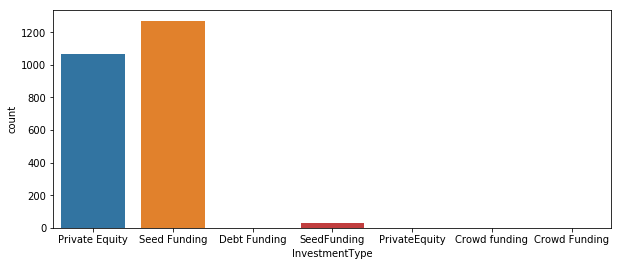

In [254]:
plt.figure(figsize=(10, 4))
sns.countplot(x='InvestmentType', data=df)

In [255]:
df['InvestmentType'].replace({'SeedFunding': 'Seed Funding', 
                              'Crowd funding': 'Crowd Funding',
                              'PrivateEquity': 'Private Equity'}, inplace=True)

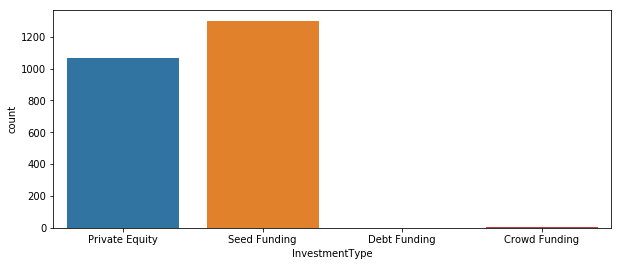

In [256]:
plt.figure(figsize=(10, 4))
sns.countplot(x='InvestmentType', data=df)